In [855]:
#Importing required libraries to perform calculations, build models and make plots.
import numpy as np
import pandas as pd
# import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model, preprocessing
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [856]:
#Reading data from a file and creating a dataframe in pandas
data = pd.read_csv('Pima_Indian_diabetes.csv')

# Exploratory Data Analysis

In [857]:
'''
This is utility function it is used to plot density histogram of the given data.
'''
def plotDensityHistogram(data):
    sns.distplot(data, hist=True, kde=True, bins=int(180/5), color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

In [858]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,742.000000,752.000000,768.000000,746.000000,768.000000,757.000000,768.000000,749.000000,768.000000
mean,3.866601,119.966097,68.886078,20.309879,79.799479,31.711151,0.471876,33.761336,0.348958
std,3.479971,32.367659,19.427448,15.974523,115.244002,8.544789,0.331329,12.297409,0.476951
min,-5.412815,0.000000,-3.496455,-11.945520,0.000000,-16.288921,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.243750,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


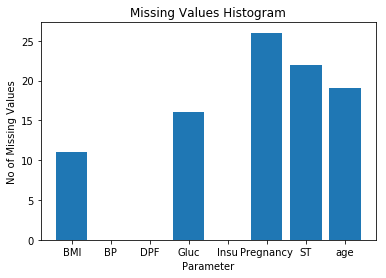

In [859]:
#Calculating the no of NaN values in the data set and plotting the count
preg_nancount = len(data[data.Pregnancies.isna()].index)
st_nancount = len(data[data.SkinThickness.isna()].index)
bp_nancount = len(data[data.BloodPressure.isna()].index)
glu_nancount = len(data[data.Glucose.isna()].index)
in_nancount = len(data[data.Insulin.isna()].index)
bmi_nancount = len(data[data.BMI.isna()].index)
dpf_nancount = len(data[data.DiabetesPedigreeFunction.isna()].index)
age_nancount = len(data[data.Age.isna()].index)
nan_count = {}
nan_count['Pregnancy'] = preg_nancount
nan_count['Gluc'] = glu_nancount
nan_count['BP'] = bp_nancount
nan_count['ST'] = st_nancount
nan_count['Insu'] = in_nancount
nan_count['BMI'] = bmi_nancount
nan_count['DPF'] = dpf_nancount
nan_count['age'] = age_nancount
nan_count

nan_c = pd.DataFrame.from_dict(nan_count, orient = 'index')
nan_c_values = nan_c[0]
nan_c
plt.bar(nan_c.index, height = nan_c[0])
plt.title('Missing Values Histogram')
plt.xlabel('Parameter')
plt.ylabel('No of Missing Values')
plt.show()

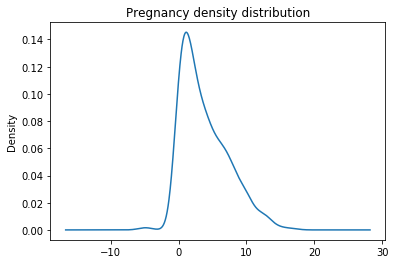

In [860]:
data['Pregnancies'].plot.kde(title = "Pregnancy density distribution")

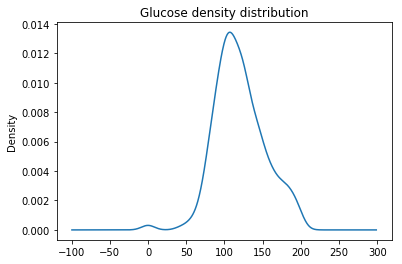

In [861]:
data['Glucose'].plot.kde(title = "Glucose density distribution")

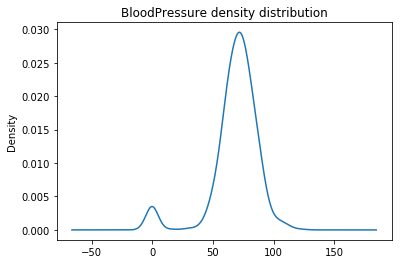

In [862]:
data['BloodPressure'].plot.kde(title = "BloodPressure density distribution")

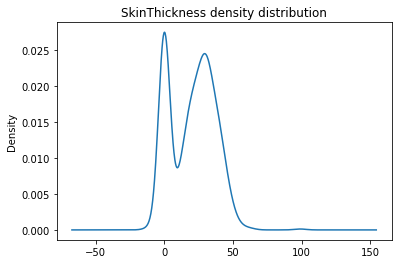

In [863]:
data['SkinThickness'].plot.kde(title = "SkinThickness density distribution")

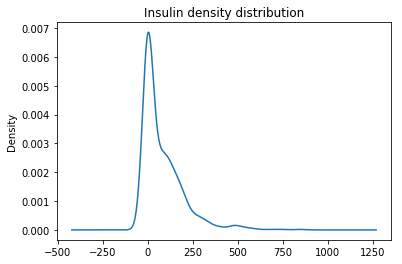

In [864]:
data['Insulin'].plot.kde(title = "Insulin density distribution")

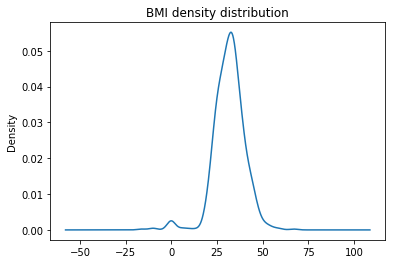

In [865]:
data['BMI'].plot.kde(title = "BMI density distribution")

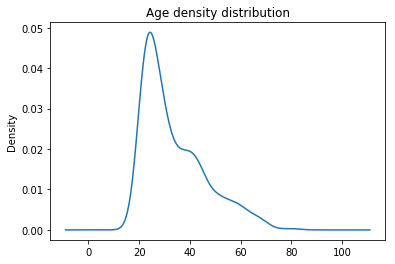

In [866]:
data['Age'].plot.kde(title = "Age density distribution")

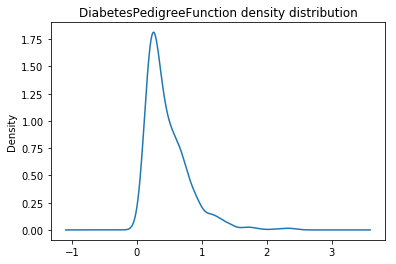

In [867]:
data['DiabetesPedigreeFunction'].plot.kde(title = "DiabetesPedigreeFunction density distribution")

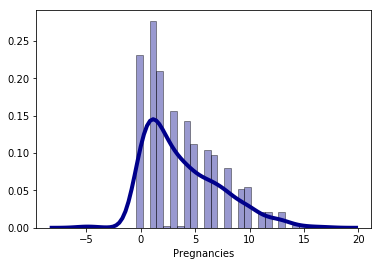

In [868]:
plotDensityHistogram(data["Pregnancies"].dropna(how = 'all'))

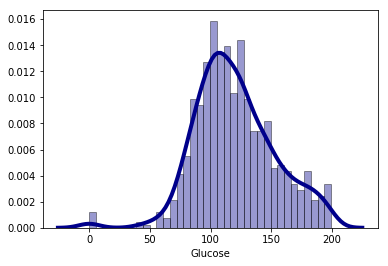

In [869]:
plotDensityHistogram(data["Glucose"].dropna(how = 'all'))

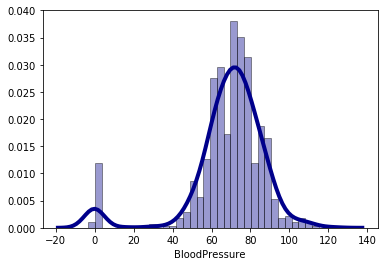

In [870]:
plotDensityHistogram(data["BloodPressure"].dropna(how = 'all'))


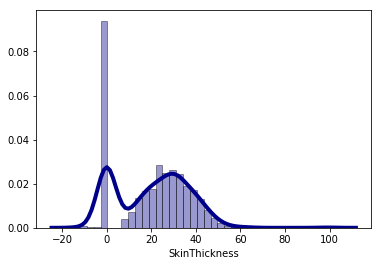

In [871]:
plotDensityHistogram(data["SkinThickness"].dropna(how = 'all'))

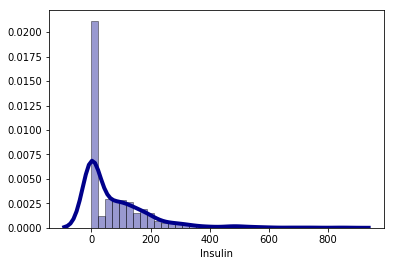

In [872]:
plotDensityHistogram(data["Insulin"].dropna(how = 'all'))

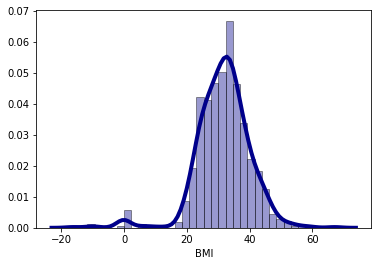

In [873]:
plotDensityHistogram(data["BMI"].dropna(how = 'all'))

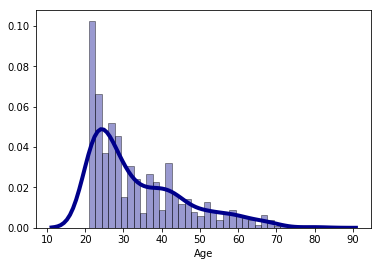

In [874]:
plotDensityHistogram(data["Age"].dropna(how = 'all'))


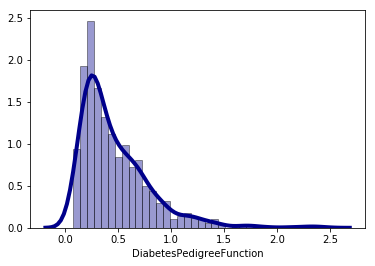

In [875]:
plotDensityHistogram(data["DiabetesPedigreeFunction"].dropna(how = 'all'))

# Data PrePreocessing

In [876]:
#making all the ilegal values of every features NaN in the dataframe
data.loc[data['SkinThickness'] <= 0, 'SkinThickness'] = np.NaN
data.loc[data['Pregnancies'] < 0, 'Pregnancies'] = np.NaN
data.loc[data['Glucose'] <= 0, 'Glucose'] = np.NaN
data.loc[data['BloodPressure'] <= 0, 'BloodPressure'] = np.NaN
data.loc[data['BMI'] <= 0, 'BMI'] = np.NaN
data.loc[data['Insulin'] <= 0, 'Insulin'] = np.NaN


In [877]:
#making all the values of Pregnancies column NaN if it is not an integer
pregs = np.array(data['Pregnancies'])
for i in range(len(pregs)):
    if not pregs[i].is_integer():
        pregs[i] = np.NaN
data['Pregnancies'] =  pregs

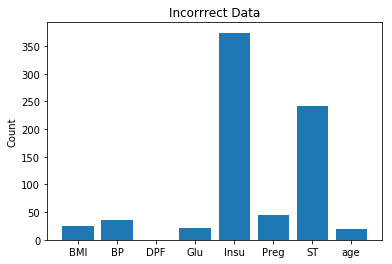

In [878]:
#Calculating the no of NaN/incorrect values in the data set and plotting the count
preg_nancount = len(data[data.Pregnancies.isna()].index)
st_nancount = len(data[data.SkinThickness.isna()].index)
bp_nancount = len(data[data.BloodPressure.isna()].index)
glu_nancount = len(data[data.Glucose.isna()].index)
in_nancount = len(data[data.Insulin.isna()].index)
bmi_nancount = len(data[data.BMI.isna()].index)
dpf_nancount = len(data[data.DiabetesPedigreeFunction.isna()].index)
age_nancount = len(data[data.Age.isna()].index)
nan_count = {}
nan_count['Preg'] = preg_nancount
nan_count['Glu'] = glu_nancount
nan_count['BP'] = bp_nancount
nan_count['ST'] = st_nancount
nan_count['Insu'] = in_nancount
nan_count['BMI'] = bmi_nancount
nan_count['DPF'] = dpf_nancount
nan_count['age'] = age_nancount
nan_count

nan_c = pd.DataFrame.from_dict(nan_count, orient = 'index')
nan_c_values = nan_c[0]
nan_c
plt.bar(nan_c.index, height = nan_c[0])
plt.title('Incorrrect Data')
plt.ylabel('Count')
plt.show()

In [879]:
#Removing rows with NaN in BloodPressure
data = data.drop(data[data.BloodPressure.isna()].index, axis = 0)

In [880]:
#Removing raws with NaN in Glucose
data = data.drop(data[data.Glucose.isna()].index, axis = 0)

In [881]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,668.000000,712.000000,712.000000,506.000000,381.000000,695.000000,712.000000,694.000000,712.000000
mean,3.836826,120.963081,72.159634,28.899778,155.241470,32.434736,0.477538,33.724529,0.345506
std,3.361573,31.040408,12.573856,10.559644,119.326264,7.098789,0.336771,12.059196,0.475867
min,0.000000,42.974768,15.372031,7.000000,14.000000,6.699051,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,21.000000,76.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,116.500000,72.000000,29.000000,125.000000,32.400000,0.380000,29.000000,0.000000
75%,6.000000,140.118555,80.000000,36.000000,190.000000,36.600000,0.629500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.000000


In [882]:
#Correlation Matrix
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.124790,0.208128,0.097101,0.056462,-0.001636,-0.053676,0.515770,0.218899
Glucose,0.124790,1.000000,0.201763,0.237871,0.585062,0.193236,0.121224,0.250313,0.489716
BloodPressure,0.208128,0.201763,1.000000,0.211671,0.103649,0.292120,-0.001444,0.306953,0.169194
SkinThickness,0.097101,0.237871,0.211671,1.000000,0.187089,0.625212,0.129319,0.116579,0.261451
Insulin,0.056462,0.585062,0.103649,0.187089,1.000000,0.226882,0.130003,0.191785,0.294302
BMI,-0.001636,0.193236,0.292120,0.625212,0.226882,1.000000,0.167731,0.035747,0.286202
DiabetesPedigreeFunction,-0.053676,0.121224,-0.001444,0.129319,0.130003,0.167731,1.000000,0.021906,0.176391
Age,0.515770,0.250313,0.306953,0.116579,0.191785,0.035747,0.021906,1.000000,0.233001
Outcome,0.218899,0.489716,0.169194,0.261451,0.294302,0.286202,0.176391,0.233001,1.000000


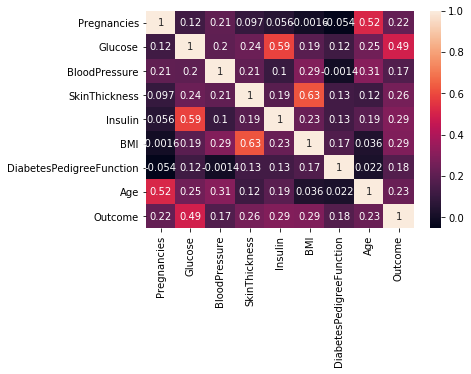

In [883]:
heat_map = sns.heatmap(data.corr(), annot = True)

In [884]:
#Replacing NaN with mode or median in Pregnancies, BMI, Age
data['Pregnancies'] = data['Pregnancies'].fillna(data['Pregnancies'].mode()[0])
data['BMI'] = data['BMI'].fillna(data['BMI'].mode()[0])                            
data['Age'] = data['Age'].fillna(data['Age'].mode()[0])

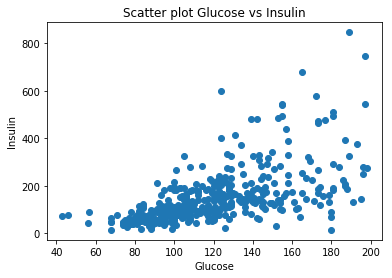

In [885]:
plt.scatter(data['Glucose'], data['Insulin'] )
plt.title('Scatter plot Glucose vs Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()


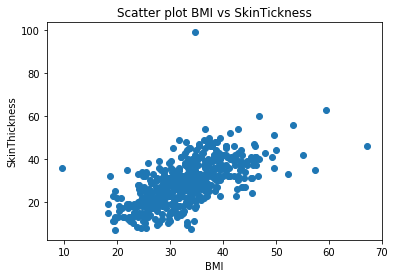

In [886]:
plt.scatter(data['BMI'], data['SkinThickness'] )
plt.title('Scatter plot BMI vs SkinTickness')
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.show()

# Linear Regression

In [887]:
'''
linearRegressionPrediction takes data, inp_fearures, out_features.
in_features are used to impute the missing values of out_features using multivarailte LinearRegression.
'''
def linearRegressionPrediction(data, inp_features, out_feature):
    #creating a copy of the actual data
    dat = data.copy()
    #droping all the data points whose out_feature attribute is NaN, this data will be used to fit linear regression model
    
    noNaNdata = dat.drop(dat[out_feature].index[dat[out_feature].apply(np.isnan)], axis = 0)
    
    #all the data points whose values of out_features are missing are stored in the variable tobepredicted 
    tobepredicted = dat[inp_features].loc[dat[out_feature].index[dat[out_feature].apply(np.isnan)]]
    
    
    df = pd.DataFrame(noNaNdata, columns = inp_features)
    target = pd.DataFrame(noNaNdata, columns = [out_feature])
    
    lm = linear_model.LinearRegression()
    
    model = lm.fit(df, target)
    
    #predicting the missing values of out_features in 'tobepredicted' .
    prediction_values = lm.predict(np.array(tobepredicted[inp_features]))
    
    #this function returns the predicted values for missing data and the corresponding indices of the midding values 
    return (np.matrix.transpose(np.array(prediction_values))[0], np.array(dat[out_feature].index[dat[out_feature].apply(np.isnan)]))

# Missing Data Handling

In [888]:
predicted_values, nanIdx = linearRegressionPrediction(data, ['BMI'], 'SkinThickness')
data['SkinThickness'].loc[nanIdx] = predicted_values
data.describe()

/usr/lib/python3/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,712.000000,712.000000,712.000000,712.000000,381.000000,712.000000,712.000000,712.000000,712.000000
mean,3.661517,120.963081,72.159634,28.501143,155.241470,32.414805,0.477538,33.428122,0.345506
std,3.326877,31.040408,12.573856,9.573556,119.326264,7.014569,0.336771,12.047187,0.475867
min,0.000000,42.974768,15.372031,4.453716,14.000000,6.699051,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.000000,27.600000,0.245000,24.000000,0.000000
50%,3.000000,116.500000,72.000000,28.000000,125.000000,32.050000,0.380000,29.000000,0.000000
75%,6.000000,140.118555,80.000000,34.444238,190.000000,36.500000,0.629500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.000000


In [889]:
predicted_values, nanIdx = linearRegressionPrediction(data, ['Glucose'], 'Insulin')
data['Insulin'].loc[nanIdx] = predicted_values
data.describe()

/usr/lib/python3/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,3.661517,120.963081,72.159634,28.501143,153.842420,32.414805,0.477538,33.428122,0.345506
std,3.326877,31.040408,12.573856,9.573556,99.072382,7.014569,0.336771,12.047187,0.475867
min,0.000000,42.974768,15.372031,4.453716,-18.121266,6.699051,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,89.128299,27.600000,0.245000,24.000000,0.000000
50%,3.000000,116.500000,72.000000,28.000000,131.581251,32.050000,0.380000,29.000000,0.000000
75%,6.000000,140.118555,80.000000,34.444238,190.250000,36.500000,0.629500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.000000


# Feature Extraction

# PCA

In [890]:
'''
principalComponentAnalysis takes data and new dimensionality and returns a dataframe in a new featurespace with the dimensionality as specified.
'''
def principalComponentAnalysis(data, newDimensionality):
    #features are the existing features
    features = data.columns
    x = data.loc[:, features].values
    
    #standardising the data
    x = StandardScaler().fit_transform(x)
    
    #creating the  instance of PCA and fitting it with the standardised data
    pca = PCA(n_components = newDimensionality)
    principalComponents = pca.fit_transform(x)
    
    #creating a new dataframe based on transformed data
    data_pca = pd.DataFrame(data = principalComponents)
    return data_pca

In [891]:
data_wo_oc = data.copy()
data_wo_oc = data_wo_oc.drop('Outcome', axis = 1)

In [892]:
data_pca = principalComponentAnalysis(data_wo_oc, 3)
data_pca = data_pca.assign(Outcome = np.array(data['Outcome']))
data_pca

,0,1,2,Outcome
0,1.632958,-0.754895,0.137377,1
1,-1.652352,0.297212,-0.415584,0
2,0.726071,-1.548922,2.400115,1
3,-2.530690,-0.126610,0.344218,0
4,0.922316,3.172624,1.668797,1
5,-0.867511,-0.954490,0.125162,0
6,-1.944145,0.788615,-0.318081,1
7,2.776575,0.749898,3.123704,1
8,1.707935,-2.790023,-1.433460,1
9,0.585375,0.232432,-1.342595,0


# Model Building

# Logistic Regression

In [893]:
'''
datasplit is an utility function which ensures that after the split the training set has same ratio of instances
which are false and true as that in entire dataset.It is used to ensure that the split which happens is not biased
towards a particular outcome.
'''
def dataSplit(data, percent_test, outFeature, seed):
    np.random.seed(seed)
    lol_dat = data.copy().drop([outFeature], axis = 1)
    dat = pd.DataFrame(data[outFeature], columns  = [outFeature])
    dat1 = pd.DataFrame(dat[dat.Outcome == 1])
    dat0 = pd.DataFrame(dat[dat.Outcome == 0])
    len1 = dat1.shape[0]
    len2 = dat0.shape[0]
    percentToTrain = (1 - percent_test)
    dat1_shuffle = np.array(dat1.index)
    dat0_shuffle = np.array(dat0.index)
    np.random.shuffle(dat1_shuffle)
    np.random.shuffle(dat0_shuffle)
    a0 = dat1_shuffle[:int(percentToTrain*len1)]
    b0 = dat0_shuffle[:int(percentToTrain*len2)]
    a1 = dat1_shuffle[int(percent_test*len1):]
    b1 = dat0_shuffle[int(percent_test*len2):]
    train_idx = np.concatenate([a0, b0])
    test_idx = np.concatenate([a1, b1])
    X_train = lol_dat.loc[train_idx]
    X_test = lol_dat.loc[test_idx]
    y_train = data['Outcome'].loc[train_idx]
    y_test = data['Outcome'].loc[test_idx]
    return X_train, X_test, y_train, y_test

In [894]:
'''
logisticRegression
we are using logisticRegression to accuratley classify the patient as diabetic or not.
This funtion takes data and tagetFeature(Outcome) and testPercent

data - the input data after datapreprocessing and feature extraction

targetFeature - the targetFeature which we are trying to predict

splitratio - the ratio of splitting data into testing and training sets

this function returns final report which contains training,testing sets and classification_report.
'''

def logisticRegression(data, tarFeature, splitratio):
    dat = data.copy()
    X_train, X_test, y_train, y_test = dataSplit(dat, splitratio, tarFeature, 3)
    print(y_train, y_test)
    logmodel = LogisticRegression()
    logmodel.fit(X_train, y_train)
    predictions = logmodel.predict(X_test)
    report = {}
    report['X_TRAIN'] = np.array(X_train)
    report['X_TEST'] = np.array(X_test)
    report['Y_TRAIN'] = np.array(y_train)
    report['Y_TEST'] = np.array(y_test)
    report['TRAIN_DATA_INDEX'] = np.array(X_train.index)
    report['TEST_DATA_INDEX'] = np.array(X_test.index)
    report['FINAL_REPORT'] = classification_report(y_test,predictions)
    return report

In [895]:
final = logisticRegression(data_pca, 'Outcome', 0.25)
# final

266    1
226    1
365    1
290    1
362    1
337    1
10     1
198    1
625    1
699    1
46     1
22     1
567    1
664    1
178    1
188    1
616    1
628    1
80     1
6      1
594    1
295    1
477    1
518    1
289    1
587    1
166    1
368    1
617    1
703    1
      ..
292    0
26     0
142    0
486    0
418    0
227    0
481    0
437    0
89     0
559    0
138    0
140    0
639    0
441    0
228    0
547    0
450    0
466    0
539    0
47     0
261    0
262    0
511    0
480    0
64     0
206    0
681    0
385    0
593    0
489    0
Name: Outcome, Length: 533, dtype: int64 415    1
371    1
498    1
15     1
565    1
20     1
411    1
694    1
502    1
123    1
633    1
309    1
112    1
177    1
660    1
276    1
274    1
215    1
677    1
389    1
598    1
146    1
675    1
230    1
610    1
400    1
224    1
334    1
614    1
29     1
      ..
126    0
63     0
409    0
377    0
609    0
354    0
485    0
199    0
363    0
394    0
72     0
11     0
573    0
643    0
596  

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [896]:
print(final['FINAL_REPORT'])

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       350
           1       0.68      0.54      0.60       185

    accuracy                           0.75       535
   macro avg       0.73      0.70      0.71       535
weighted avg       0.75      0.75      0.75       535

